<!-- wasserstein distance
also called: earth movers distance
also called sinkhorn distance
Ojas Shirekar19:34
optimal transport using sinkhorn knopp gives sinkhorn distances -->

In [1]:
import os
import sys

FS_MOL_CHECKOUT_PATH = os.path.abspath("../")

os.chdir(FS_MOL_CHECKOUT_PATH)
sys.path.insert(0, FS_MOL_CHECKOUT_PATH)

In [2]:
from fs_mol.converters.smiles_to_mxm import preprocess_smile
from fs_mol.data import FSMolTask
from dpu_utils.utils import RichPath
import torch
from rdkit.Chem import Draw
from IPython.core.display import SVG

from fs_mol.utils.visualization import (
    display_molecules,
    generate_mol_from_pyg_data,
    visualize_pyg_mol_with_poses,
)
from preprocessing.geometric import get_all_divisions
from utils import generate_random_color_list

p = "/FS-MOL/datasets/fs-mol/train/CHEMBL1613997.jsonl.gz"

task = FSMolTask.load_from_file(RichPath.create(p))


def has_isolated_node(data):
    all_nodes = set(range(data.x.size(0)))
    connected_nodes = set(data.edge_index.view(-1).tolist())
    isolated_nodes = all_nodes - connected_nodes

    return len(isolated_nodes) > 0


# Example:


def _generate_highlight_map(list_of_subgraphs):
    num_subgraphs = len(list_of_subgraphs)
    colors = generate_random_color_list(num_subgraphs)

    highlight_map = {}
    for scc_index, subgraph in enumerate(list_of_subgraphs):
        for atom_index in subgraph:
            highlight_map[atom_index] = colors[scc_index]
    return highlight_map


def highlight_subgraphs(data, list_of_subgraphs):
    highlight_map = _generate_highlight_map(list_of_subgraphs)

    mol = generate_mol_from_pyg_data(data)
    drawer = Draw.rdMolDraw2D.MolDraw2DSVG(300, 300)
    opts = drawer.drawOptions()
    opts.clearBackground = False
    drawer.DrawMolecule(mol, highlightAtoms=highlight_map.keys(), highlightAtomColors=highlight_map)
    drawer.FinishDrawing()
    svg = SVG(drawer.GetDrawingText())

    return svg

In [4]:
from collections import OrderedDict
from torch_geometric.data import Data
import torch
import networkx as nx

from torch_geometric.data import Data

from fs_mol.converters.smiles_to_mxm import preprocess_smile
from torch_geometric.utils import to_undirected, to_networkx, from_networkx

import torch

from fs_mol.utils.visualization import (
    display_molecules,
    save_mol_as_svg,
    visualize_pyg_mol_with_poses,
)
from preprocessing.geometric import get_all_divisions, get_division_indices
from utils.pyg_mol_utils.removehs import removeHs


data = preprocess_smile("CC(C)Cc1ccc(cc1)[C@@H](C)C(=O)O")

data = removeHs(data)

save_mol_as_svg(generate_mol_from_pyg_data(data), f"/FS-MOL/ibuprofen/subgraphs/input.svg")

30


In [ ]:
breakdown = get_division_indices(data, 5)[-1]

highlight_subgraphs(data, breakdown)

In [7]:
from fs_mol.utils.visualization import save_mol_as_svg
from preprocessing.geometric import (
    generate_subgraphs_using_connected_components,
)


graphs = generate_subgraphs_using_connected_components(data, [breakdown])[-1]

[
    save_mol_as_svg(generate_mol_from_pyg_data(
        g), f"/FS-MOL/ibuprofen/subgraphs/{i}.svg")
    for i, g in enumerate(graphs)
]

3
6
4


[None, None, None]

4


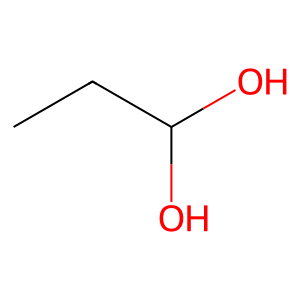

In [5]:
visualize_pyg_mol_with_poses(graphs[2])